# diabetes prediction using Decision Tree Regressor :

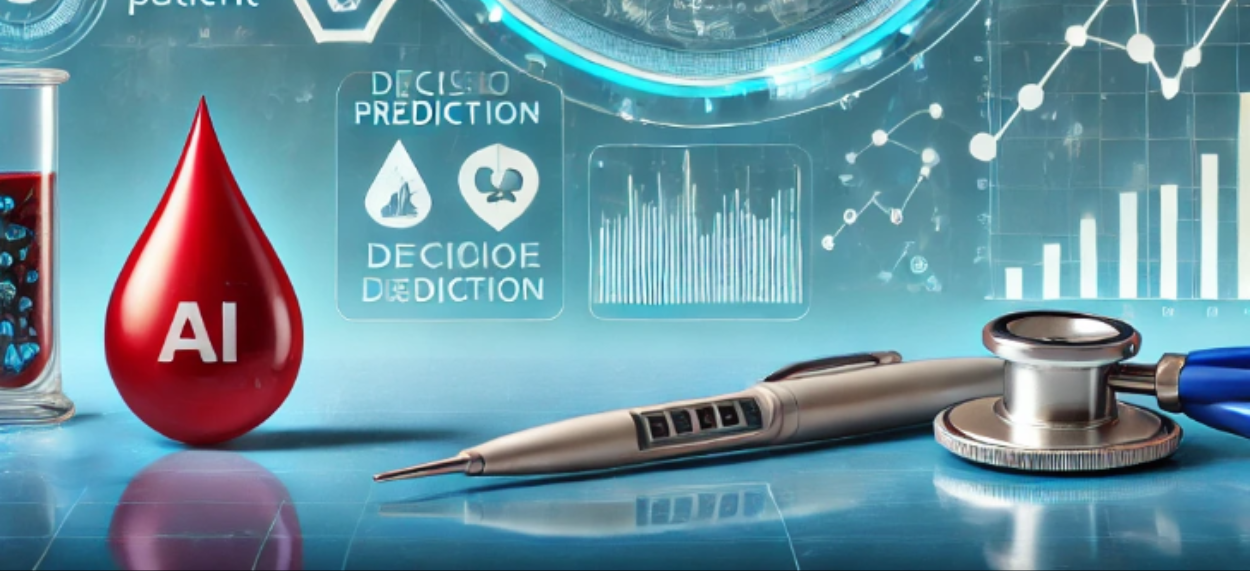

### importing the dependencies:

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### loading the dataset :

In [29]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()

In [30]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Description of the dataset :

In [31]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### dataframe for independent feature :

In [32]:
X=pd.DataFrame(data=dataset.data ,columns=dataset.feature_names)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [33]:
y=dataset['target']
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### size of the data:

In [34]:
X.shape

(442, 10)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


### train test split :

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [38]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [39]:
y_train

array([215.,  51., 173., 122., 178.,  70., 142., 306., 197.,  37., 134.,
        52., 190.,  42.,  48.,  73., 283., 192., 121., 144., 235., 141.,
       170., 139., 202., 180., 155., 233.,  93., 103.,  68., 125., 277.,
        70., 295., 196., 121., 245., 277.,  66., 141., 172.,  87., 257.,
       265., 336., 233., 116., 136., 248.,  60., 160., 143., 200., 102.,
        90., 168.,  94., 249., 252.,  79., 232.,  97., 208., 270.,  78.,
       108.,  84., 104., 220.,  91.,  95.,  64., 185.,  61., 237., 129.,
        49., 199., 134., 104., 281., 109., 142., 200., 191., 170., 220.,
        42., 109., 310., 232.,  96., 252., 214.,  72., 236.,  97.,  88.,
        71., 107., 281., 164., 160., 177., 151., 155.,  96.,  94., 242.,
       128., 182., 102., 201.,  90., 216., 210., 186.,  63.,  99., 144.,
       128., 268., 140., 219., 137.,  55., 190.,  85., 172.,  49., 168.,
        72., 198.,  89., 280., 168.,  72., 107., 310.,  50., 341., 131.,
       116.,  57., 198.,  90., 131., 263.,  71., 15

### correlation between input features:

In [40]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


### heatmap visualization :

<Axes: >

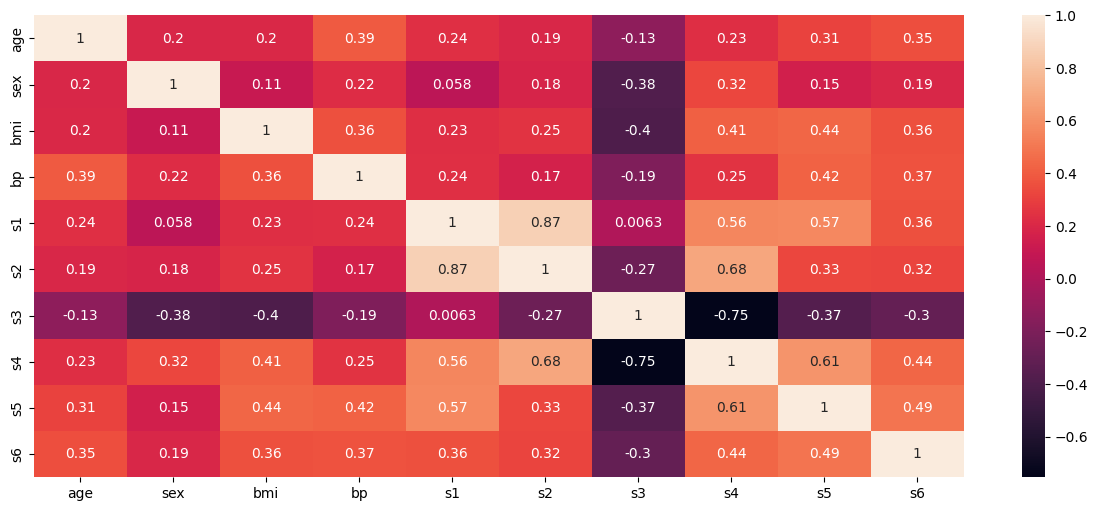

In [41]:
plt.figure(figsize=(15,6))
sns.heatmap(X_train.corr(),annot=True)

### model training :

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [43]:
y_test

array([200., 202.,  67.,  80., 151., 145.,  65., 308.,  42.,  92., 150.,
       202., 184., 101.,  47., 237.,  88., 152., 109.,  89., 163., 274.,
       138., 275.,  63., 154., 131.,  91., 128., 129., 243., 200.,  72.,
       185., 296., 144.,  75., 175., 281., 292., 292., 214., 275.,  92.,
        65.,  31.,  53.,  51., 258.,  40.,  69.,  86., 142., 128., 243.,
        55., 144., 230., 265.,  63., 217., 102.,  66., 101., 137., 261.,
       147.,  64., 252.,  59., 220., 126.,  43.,  48., 217., 164., 143.,
       206.,  72., 110., 244.,  51.,  52., 302., 276., 150., 124., 114.,
       179.,  91., 257.,  84., 131., 150., 293., 127.,  39.,  83., 191.,
        65.,  65., 265., 242., 219.,  69., 178., 170., 279.,  83.,  45.,
       178., 174., 214., 202.,  99.,  94., 235., 158.,  59., 220., 275.,
       242., 113.,  71.,  81.,  85., 297., 253., 104.,  77.,  53.,  91.,
       283.])

In [44]:
y_pred=regressor.predict(X_test)
y_pred

array([109., 220., 245.,  73., 210., 141., 104., 259.,  39.,  72.,  72.,
       196.,  95., 178.,  97., 259., 168.,  55., 281.,  87., 229., 336.,
        52., 332.,  85.,  66., 206., 151., 225.,  78., 252., 196.,  97.,
       177., 191.,  68.,  52.,  70., 132., 208., 123., 118., 259., 153.,
        98., 134.,  96., 111., 281.,  25., 233., 252.,  55., 332., 277.,
        81., 135., 183., 225.,  73., 248.,  60., 199.,  64.,  97., 259.,
       103.,  75., 109., 200., 121.,  68.,  83.,  49., 121., 116., 232.,
       120.,  96., 178., 235., 111., 310., 246., 121.,  88., 151.,  84.,
        96., 196., 288.,  49., 321., 191.,  70.,  87., 182., 151.,  96.,
        52., 199., 237., 258., 170., 113., 185.,  70., 182., 219.,  64.,
        90.,  96.,  97.,  70., 143.,  68., 232., 113., 118., 209., 259.,
       245., 109., 199., 111., 167., 123.,  91., 199.,  52., 160.,  73.,
       259.])

### accuracy score:

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
print(f"mean absolute error : {mean_absolute_error(y_test,y_pred)}")
print(f"mean squared error: {mean_squared_error(y_test,y_pred)}")
print(f"r2 score : {r2_score(y_test,y_pred)}")

mean absolute error : 66.59398496240601
mean squared error: 7285.075187969925
r2 score : -0.15130433907839724


##### the accuracy of the model is too low since the decision tree regressor face too much struggle with continuous data and here in every columns the data is continuous with low values.

### Hyperparameter Tuning :

In [48]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [49]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
regressor1=DecisionTreeRegressor()

In [54]:
grid=GridSearchCV(regressor1,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [58]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [59]:
grid.param_grid

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [60]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [61]:
## predictions
y_pred1=grid.predict(X_test)
y_pred1

array([218.89361702, 218.89361702, 171.67857143, 127.91891892,
       180.6       , 180.6       , 100.84684685, 218.89361702,
       100.84684685, 100.84684685, 100.84684685, 171.67857143,
       180.6       , 100.84684685, 127.91891892, 126.76470588,
       100.84684685, 100.84684685, 180.6       , 127.91891892,
       201.8125    , 218.89361702, 100.84684685, 218.89361702,
       100.84684685, 100.84684685, 218.89361702, 100.84684685,
       171.67857143, 127.91891892, 274.30769231, 126.76470588,
       100.84684685, 127.91891892, 218.89361702, 201.8125    ,
       100.84684685, 126.76470588, 274.30769231, 201.8125    ,
       201.8125    , 127.91891892, 218.89361702, 100.84684685,
       100.84684685, 100.84684685, 100.84684685, 100.84684685,
       218.89361702, 100.84684685, 171.67857143, 100.84684685,
       100.84684685, 218.89361702, 218.89361702, 127.91891892,
       100.84684685, 127.91891892, 218.89361702, 127.91891892,
       218.89361702, 100.84684685, 127.91891892, 100.84

In [62]:
print(f"mean absolute error : {mean_absolute_error(y_test,y_pred1)}")
print(f"mean squared error: {mean_squared_error(y_test,y_pred1)}")
print(f"r2 score : {r2_score(y_test,y_pred1)}")

mean absolute error : 53.12040401977247
mean squared error: 4207.953345047566
r2 score : 0.33499177156155946


### selecting the model with best params:

In [63]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

### Visualize the Decision Tree :

[Text(0.5089285714285714, 0.9, 'x[0] <= 0.058\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.2857142857142857, 0.7, 'x[0] <= 0.027\nfriedman_mse = 5758.271\nsamples = 270\nvalue = 148.374'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[8] <= 0.009\nfriedman_mse = 5651.329\nsamples = 210\nvalue = 140.771'),
 Text(0.07142857142857142, 0.3, 'x[3] <= 0.042\nfriedman_mse = 3355.924\nsamples = 130\nvalue = 109.915'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 2641.898\nsamples = 119\nvalue = 105.034'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 8033.471\nsamples = 11\nvalue = 162.727'),
 Text(0.21428571428571427, 0.3, 'x[2] <= 0.019\nfriedman_mse = 5320.08\nsamples = 80\nvalue = 190.912'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 3888.138\nsamples = 40\nvalue = 158.75'),
 Text(0.25, 0.1, 'friedman_mse = 4683.169\nsamples = 40\nvalue = 223.075'),
 Text(0.42857142857142855, 0.5, 'x[0] <= 0.042\nfriedman_mse = 5222.216\nsamp

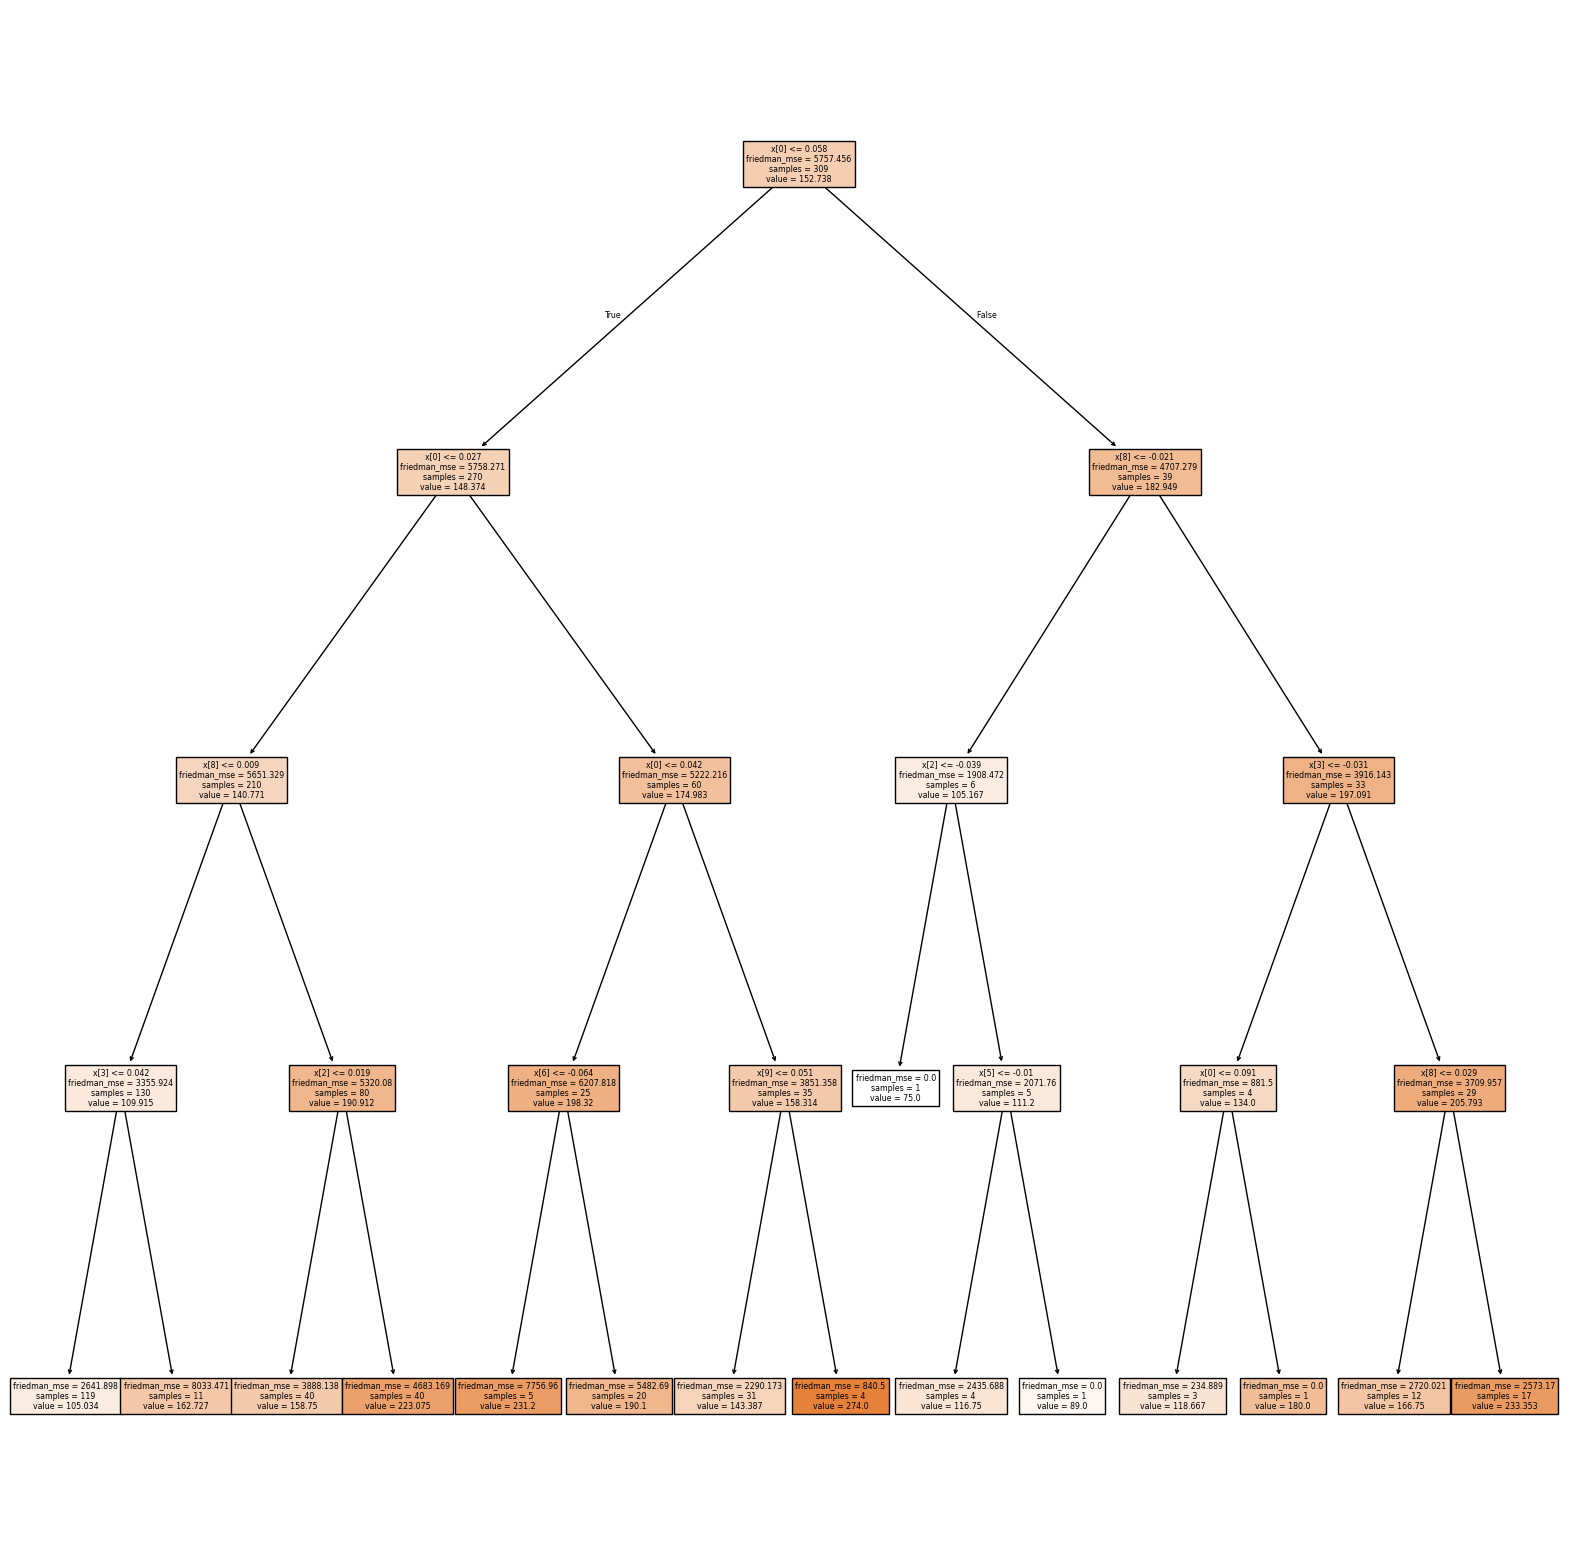

In [66]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(selectedmodel,filled=True)